In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

Mean Squared Error: 4085.025480871632


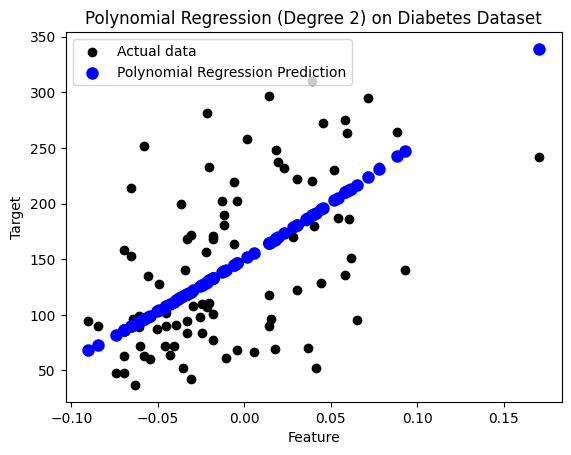

In [2]:


# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Use a single feature for simplicity (you can choose a different feature)
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 2 (you can change the degree as needed)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.scatter(X_test, y_pred, color='blue', linewidth=3, label='Polynomial Regression Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title(f'Polynomial Regression (Degree {degree}) on Diabetes Dataset')
plt.show()


Mean Squared Error: 2878.559386186606
Lasso Coefficients:
[  35.34745133 -231.90666401  551.3032416   341.31346895 -483.56713972
  165.99053164  -25.8348991   216.87580276  566.81500336   49.70247477]


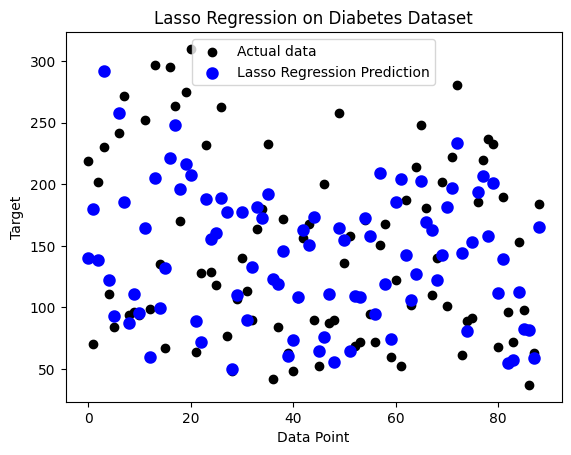

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso regression with alpha parameter (you can adjust alpha as needed)
alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients of the model
print("Lasso Coefficients:")
print(lasso_model.coef_)

# Plot the results
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual data')
plt.scatter(range(len(y_test)), y_pred, color='blue', linewidth=3, label='Lasso Regression Prediction')
plt.xlabel('Data Point')
plt.ylabel('Target')
plt.legend()
plt.title(f'Lasso Regression on Diabetes Dataset')
plt.show()


Mean Squared Error: 2856.4868876706537
Ridge Coefficients:
[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]


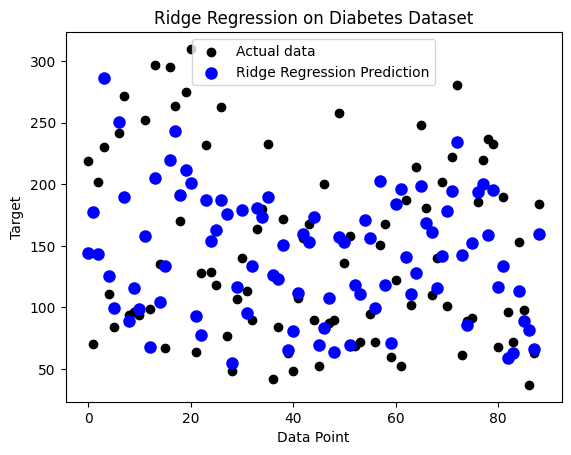

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression with alpha parameter (you can adjust alpha as needed)
alpha = 0.1
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients of the model
print("Ridge Coefficients:")
print(ridge_model.coef_)

# Plot the results
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual data')
plt.scatter(range(len(y_test)), y_pred, color='blue', linewidth=3, label='Ridge Regression Prediction')
plt.xlabel('Data Point')
plt.ylabel('Target')
plt.legend()
plt.title(f'Ridge Regression on Diabetes Dataset')
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, let's use only two classes (0 and 1)
binary_mask = (y == 0) | (y == 1)
X = X[binary_mask]
y = y[binary_mask]

# Standardize features (optional but recommended for logistic regression)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot decision boundary (only for two features)
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()


Accuracy: 1.0
Confusion Matrix:
[[12  0]
 [ 0  8]]
